In [ ]:
from IPython.display import clear_output
!pip install -q tensorflow

In [ ]:
!pip install -q tensorflow_quantum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 46.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platfo

In [ ]:
!pip install cirq===1.3.0
clear_output()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow_quantum as tq
import cirq
import sympy

from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt


In [ ]:
#printing versions we're using
print("We are using the Tensorflow-quantum verions {}".format(tq.__version__))
print("We are using the Cirq verions {}".format(cirq.__version__))

We are using the Tensorflow-quantum verions 0.7.2
We are using the Cirq verions 1.3.0


In [ ]:
from tensorflow.keras.datasets import fashion_mnist as dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("the shape of X_train is {}".format(X_train.shape))
print("the shape of y_train is {}".format(y_train.shape))
print("the shape of X_test is {}".format(X_test.shape))
print("the shape of y_test is {}".format(y_test.shape))

the shape of X_train is (60000, 28, 28)
the shape of y_train is (60000,)
the shape of X_test is (10000, 28, 28)
the shape of y_test is (10000,)


In [ ]:
l1 = [3,2,3,4]
for i in l1:
  print((i==3)|(i==2))

True
True
True
False


In [ ]:
def filter_data(x,y):
  """

  Helper function to filter dataset for label 5 and 9

  """
  keep = (y==5) | (y==9)
  x, y = x[keep], y[keep]

  # y = true if y == 5 y = false if y == 9
  y = y == 5
  return x,y

In [ ]:
X_train, y_train = filter_data(X_train, y_train)

X_test, y_test = filter_data(X_test, y_test)

In [ ]:
print("the shape of X_train is {}".format(X_train.shape))
print("the shape of y_train is {}".format(y_train.shape))
print("the shape of X_test is {}".format(X_test.shape))
print("the shape of y_test is {}".format(y_test.shape))

the shape of X_train is (12000, 28, 28)
the shape of y_train is (12000,)
the shape of X_test is (2000, 28, 28)
the shape of y_test is (2000,)


the first image has the label False


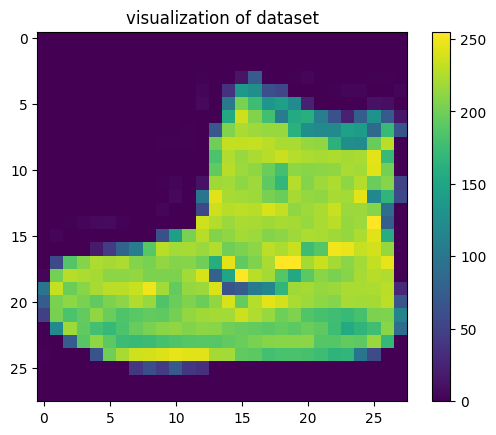

In [ ]:
print("the first image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title("visualization of dataset")
plt.show()

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

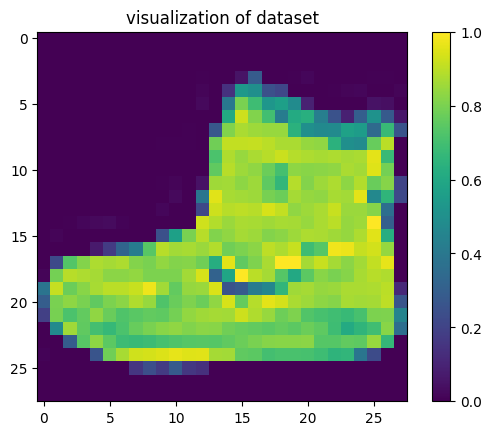

In [ ]:
plt.imshow(X_train[0])
plt.colorbar()
plt.title("visualization of dataset")
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [ ]:
X_train = tf.image.resize(X_train,(2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()

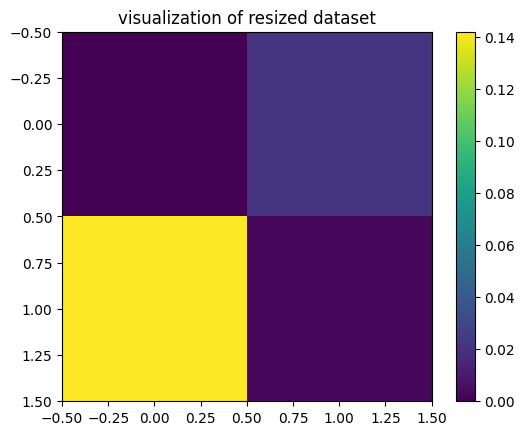

In [ ]:
plt.imshow(X_train[1, : , :, 0])
plt.colorbar()
plt.title("visualization of resized dataset")
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

In [ ]:
print("the shape of X_train is {}".format(X_train.shape))
print("the shape of y_train is {}".format(y_train.shape))
print("the shape of X_valid is {}".format(X_valid.shape))
print("the shape of y_valid is {}".format(y_valid.shape))

the shape of X_train is (10200, 2, 2, 1)
the shape of y_train is (10200,)
the shape of X_valid is (1800, 2, 2, 1)
the shape of y_valid is (1800,)


Data encoding

In [ ]:
#flattening the images
X_train = X_train.reshape(X_train.shape[0], *(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(1,4,1))
X_test = X_test.reshape(X_test.shape[0], *(1,4,1))

In [ ]:
print(X_valid[0])

[[[0.        ]
  [0.        ]
  [0.19803922]
  [0.15392157]]]


In [ ]:
def binary_encode(x, threshold=0.5):
  """
  Encodes the given dataset to use binary encoding

  Parameters:
  X (array) : Image data to be processed
  threshold - threshold for binary encoding, 0.5 by default

  Returns :
  encoded_images (array) : binary encoded image data

  if X > 0.5 :
    X = 1
  else :
    X = 0

  """
  encoded_images = list()
  for image in x:
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)

  return np.array(encoded_images)


In [ ]:
X_train = binary_encode(X_train)

In [ ]:
print(X_train[0])

[0 0 1 1]


In [ ]:
print("the shape of X_train is {}".format(X_train.shape))

the shape of X_train is (10200, 4)


In [ ]:
def create_circuit_from_image(encoded_image):
  """
  Returns a circuit for given encoded images

  """
  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()

  for i,pixel in enumerate(encoded_image):
    if pixel :
      circuit.append(cirq.X(qubits[i]))

    return circuit

In [ ]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

In [ ]:
(X_train[1])

In [ ]:
X_train_tfq = tq.convert_to_tensor(X_train)

In [ ]:
print(X_train_tfq[0])

tf.Tensor(b'\n\x0e\n\x0ctfq_gate_set\x12\x02\x08\x01', shape=(), dtype=string)


In [ ]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [ ]:
X_valid =  [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test =  [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [ ]:
X_valid_tfq = tq.convert_to_tensor(X_valid)
X_test_tfq = tq.convert_to_tensor(X_test)

Quantum Neural Network

In [ ]:
# 1. build class that adds gates layer by layer
# 2. Define the QNN using class from above step

class QNN():
  def __init__(self, data_qubits, readout):
    self.data_qubits = data_qubits
    self.readout = readout

  def add_singleQubit_gate(self, circuit, gate, qubit_index):
    """
    Adds single qubit gate to the circuit

    parameters:
    circuit(cirq.Circuit object) : Cirq circuit
    gate(cirq gate) : gate to append to the circuit
    gate[cirq_gate] : gate to append to circuit
    qubit_index(list) : index of qubits to apply the gate

    Returns:
    None

    """

    for index in qubit_index:
      circuit.append(gate(self.data_qubits[index]))

  def add_twoQubit_gate(self, circuit, gate, qubit_index):

    """
    Adds two qubit gate to the circuit

    parameters:
    circuit(cirq.Circuit object) : Cirq circuit
    gate(cirq gate) : gate to append to the circuit
    gate[cirq_gate] : gate to append to circuit
    qubit_index(list) : index of qubits to apply the gate

    Returns:
    None

    """
    if len(qubit_index)!= 2:
      raise Exception("the length of the list of indices passed for two qubit \ gate operations must be equal to two")

    circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

  def add_layer(self, circuit, gate, symbol_gate):

    """
    Adds new gates/layers to the circuit

    parameters:
    circuit(cirq.Circuit object) : Cirq circuit
    gate(cirq gate) : gate to append to the circuit
    gate[cirq_gate] : gate to append to circuit
    qubit_index(list) : index of qubits to apply the gate

    Returns:
    None

    """

    for i,qubit in enumerate(self.data_qubits):
      # symbol = sympy.Symbol(symbol_gate, '-' + str(i))
      symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
      circuit.append(gate(qubit, self.readout)**symbol)



In [ ]:
#encoding data into circuits
#applying gates to circuit
# measurement -> way of getting output from qml.

def create_qnn():
  data_qubits = cirq.GridQubit.rect(2,2)
  readout = cirq.GridQubit(-1,-1)
  circuit = cirq.Circuit()

  circuit.append(cirq.X(readout))
  circuit.append(cirq.H(readout))

  qnn = QNN(
      data_qubits = data_qubits,
      readout = readout
  )

  qnn.add_layer(circuit, cirq.XX, "xx")
  qnn.add_layer(circuit, cirq.ZZ, "zz")

  circuit.append(cirq.H(readout))

  return circuit, cirq.Z(readout)

In [ ]:
qmodel, model_readout = create_qnn()

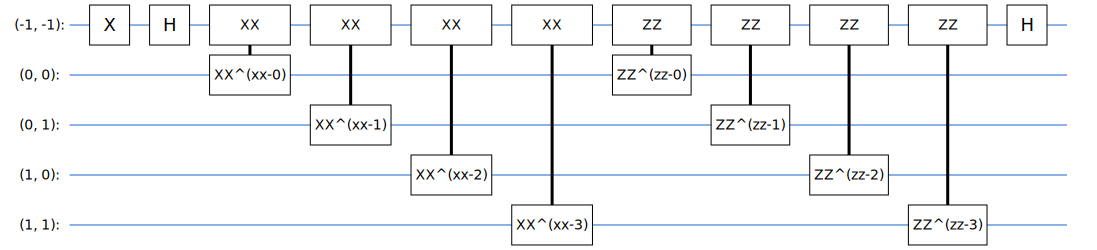

In [ ]:
SVGCircuit(qmodel)

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(), dtype=tf.string),

        tq.layers.PQC(qmodel, model_readout),
    ]
)

In [ ]:
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])

In [ ]:
print(y_train_h[0])

1


In [ ]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [ ]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Epoch 1/10
160/160 [==============================] - 11s 52ms/step - loss: 1.0006 - hinge_accuracy: 0.4994 - val_loss: 0.9983 - val_hinge_accuracy: 0.5005
Epoch 2/10
160/160 [==============================] - 9s 58ms/step - loss: 1.0009 - hinge_accuracy: 0.4994 - val_loss: 0.9986 - val_hinge_accuracy: 0.5005
Epoch 3/10
160/160 [==============================] - 8s 51ms/step - loss: 1.0007 - hinge_accuracy: 0.4994 - val_loss: 0.9984 - val_hinge_accuracy: 0.5005
Epoch 4/10
160/160 [==============================] - 9s 55ms/step - loss: 1.0008 - hinge_accuracy: 0.4986 - val_loss: 0.9985 - val_hinge_accuracy: 0.5005
Epoch 5/10
160/160 [==============================] - 8s 49ms/step - loss: 1.0005 - hinge_accuracy: 0.4997 - val_loss: 0.9990 - val_hinge_accuracy: 0.5005
Epoch 6/10
160/160 [==============================] - 8s 49ms/step - loss: 1.0005 - hinge_accuracy: 0.4989 - val_loss: 0.9989 - val_hinge_accuracy: 0.5005
Epoch 7/10
160/160 [==============================] - 8s 51ms/step - 

In [ ]:
model.evaluate(X_test_tfq, y_test_h)

63/63 [==============================] - 1s 23ms/step - loss: 0.9999 - hinge_accuracy: 0.5000


[0.9999096393585205, 0.5]

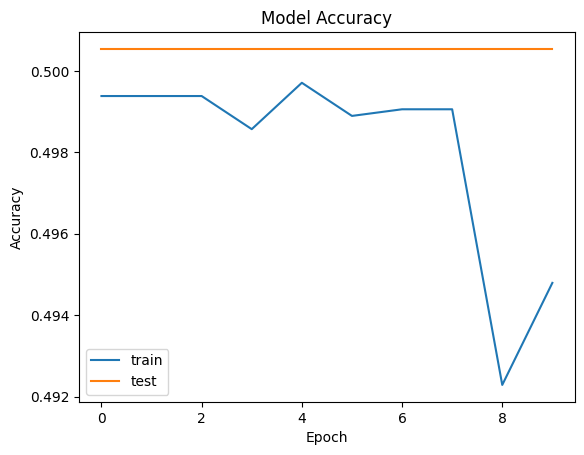

In [ ]:
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

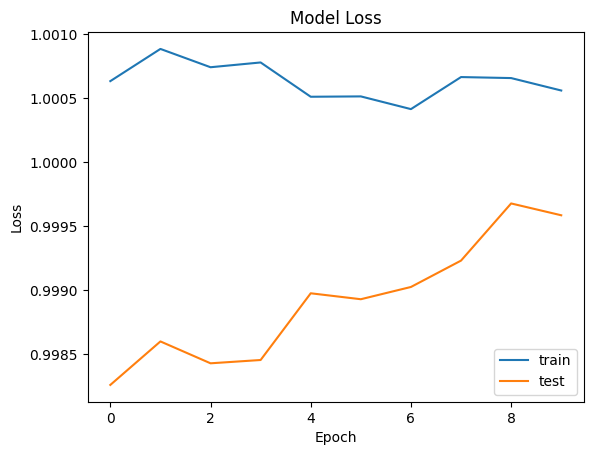

In [ ]:
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

In [ ]:
model.save_weights('/content/sample_data/QModelWeights')